In [1]:
import pandas as pd
electricity = pd.read_excel('Folds5x2_pp.xlsx')
print(electricity.info())
electricity.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB
None


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [3]:
train_sizes = [1, 100, 500, 2000, 5000, 7654]

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
features = ['AT', 'V', 'AP', 'RH']
target = 'PE'

In [5]:
lr = LinearRegression()

In [6]:
X = electricity[features]
y = electricity[target]

In [7]:
lr.fit(X, y)

LinearRegression()

In [11]:
lr.predict([[12.45, 65.34, 2099.2, 40.33]])

/Users/hanisami/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([538.6553307])

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = electricity[features],
y = electricity[target], train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [15]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 0)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
# print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       -0.000000
100     18.594403
500     19.339921
2000    20.334249
5000    20.360363
7654    20.764877
dtype: float64

 --------------------


ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

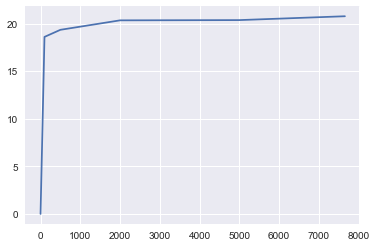

In [16]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)